In [3]:
from pathlib import Path
import json
import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import torchvision.models as models
from torchvision import datasets, transforms
from dataldr import Custom3DShapesDataset
from model import CNNEncoder
from loss import BatchAllTtripletLoss
import pandas as pd
from main import train_loop
from utils import plot_samples_from_loader,create_animation
# set device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with open('config.json') as json_file:
    config = json.load(json_file)
    data_folder = Path(config['dataset']['basepath'])

    fig_path =  Path(config['reporting']['figpath'])
    result_path = Path(config['reporting']['data'])
    model_path = Path(config['reporting']['model'])
    anim_path = Path(config['reporting']['animation'])

In [4]:
# Define data transformations (you can customize these)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the MNIST training dataset
train_dataset = datasets.MNIST(root=data_folder/'data', train=True, transform=transform, download=True)
val_dataset = datasets.MNIST(root=data_folder/'data', train=False, transform=transform, download=True)

# Create a DataLoader for the training dataset
batch_size = 64  # You can adjust this batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

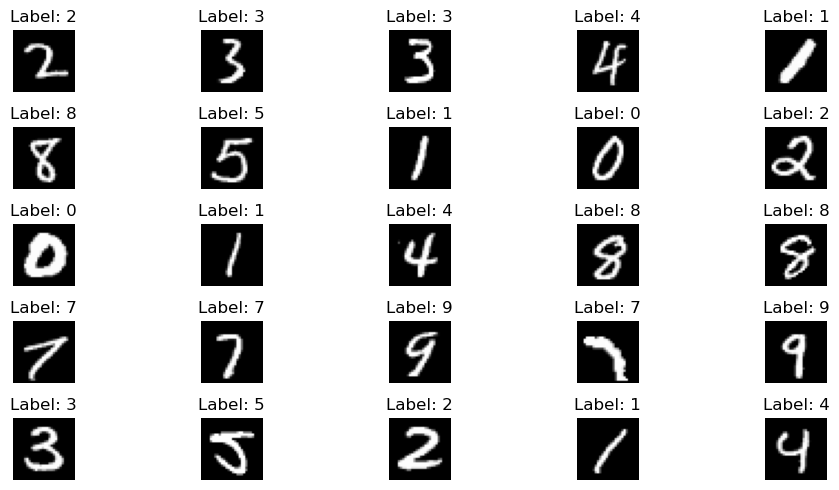

In [5]:
# Usage:
n_rows = 5  # Number of rows of subplots
n_cols = 5  # Number of columns of subplots
plot_samples_from_loader(val_loader, n_rows, n_cols, save_path=fig_path/'mnist_samples.png')

In [8]:
# Create the animation of the training process of triplet loss
import os
animation_files =  Path(config['reporting']['animation'])

image_files = [ anim_path/f"tsne_embeddings_{i}.png" for i in range(len(os.listdir(animation_files)))]

output_filename = fig_path/"mnist_tripplet_animation_advanced.gif"

create_animation(image_files, output_filename, duration=200)  # Adjust the duration as needed

In [9]:
# Create the animation of the training process of supervised contrastive loss

animation_files = Path("/net/store/cv/users/ybrima/RTGCompCog/SubCon/Anim_SCL")

image_files = [ anim_path/f"tsne_embeddings_{i}.png" for i in range(len(os.listdir(animation_files)))]

output_filename = fig_path/"mnist_scl_animation.gif"

create_animation(image_files, output_filename, duration=200)  # Adjust the duration as needed

FileNotFoundError: [Errno 2] No such file or directory: '/net/store/cv/users/ybrima/RTGCompCog/SubCon/Anim/tsne_embeddings_186.png'